In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import corner
import json
# import cabinetry

import pytensor
from pytensor import tensor as pt
from pytensor.graph.basic import Apply
from pytensor.graph import Apply, Op

import jax
from jax import grad, jit, vmap, value_and_grad, random
import jax.numpy as jnp

import pyhf
import pyhf
from pyhf.contrib.viz import brazil
# pyhf.set_backend('jax')

import pymc as pm
import arviz as az

from Bayesian_pyhf import infer
from Bayesian_pyhf import plotting

%load_ext autoreload
%autoreload 

In [9]:
blue = '#7CA1CC' # '#A8B6CC'
rosa =  '#E57A77'

# Simple Model

In [19]:
np.random.normal(100, size=20)

array([ 98.89216419, 101.42633671, 100.54778266, 102.70296765,
       100.8725651 ,  98.95688214,  99.0663036 ,  99.7043402 ,
        99.5511175 ,  98.77282424, 100.24273162,  98.84792872,
        99.24732524,  98.55454833,  99.44146722, 100.46326908,
       100.95369828,  99.98401506, 100.52020076, 100.33603904])

In [12]:
nBins = 20

model = pyhf.simplemodels.uncorrelated_background(
    signal= np.random.normal(10, size=nBins), np.random.normal(100, size=nBins), np.random.normal(10, size=nBins)
)
data = [150, 150]
auxdata = model.config.auxdata

unconstr_priors = {
    'mu': {'type': 'HalfNormal_Unconstrained', 'sigma': [0.4]},
}

n_draws = 5_000

In [13]:
with infer.model(model, unconstr_priors, data):
    step = pm.Metropolis()
    post_data = pm.sample(draws=n_draws, chains=1, step=step)
    post_pred = pm.sample_posterior_predictive(post_data)

    prior_pred = pm.sample_prior_predictive(10_000)

Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [mu]
>Metropolis: [uncorr_bkguncrt]


Sampling 1 chain for 1_000 tune and 5_000 draw iterations (1_000 + 5_000 draws total) took 6 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [Expected_Data]


Sampling: [Expected_Data, mu, uncorr_bkguncrt]


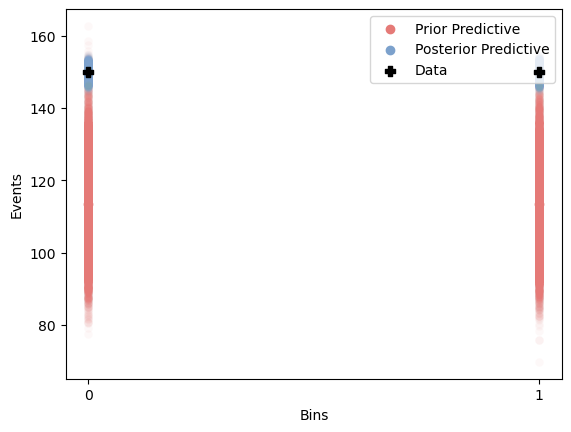

In [14]:
plotting.prior_posterior_predictives(model, data, post_pred, prior_pred, 1)

# SRee_SRmm_Srem.json

In [4]:
with open('SRee_SRmm_Srem.json') as serialized:
    spec = json.load(serialized)

workspace = pyhf.Workspace(spec)
workspace

model = workspace.model()

data = workspace.data(model, include_auxdata=False)

unconstr_priors = {
    'mu_Sig': {'type': 'HalfNormal_Unconstrained', 'sigma': [0.4]}
}

act_aux_data = workspace.data(model)
n_draws = 20_000

In [5]:
with infer.model(model, unconstr_priors, data):
    step = pm.Metropolis()
    post_data = pm.sample(draws=n_draws, chains=1, step=step)
    post_pred = pm.sample_posterior_predictive(post_data)
    prior_pred = pm.sample_prior_predictive(10_000)

Sequential sampling (1 chains in 1 job)
CompoundStep
>Metropolis: [lumi]
>Metropolis: [mu_Sig]
>Metropolis: [ucbSRee]
>Metropolis: [SigXSec]
>Metropolis: [cuts_SRee_LRT]
>Metropolis: [cuts_SRee_LRTfilter]
>Metropolis: [ucsSRee_Slep_1000_10]
>Metropolis: [ucsSRee_disp]
>Metropolis: [ucsSRee_pileupWeight]
>Metropolis: [ucbSRem]
>Metropolis: [ucbSRmm]
>Metropolis: [cuts_SRmm_LRT]
>Metropolis: [cuts_SRmm_LRTfilter]
>Metropolis: [ucsSRmm_Slep_1000_10]
>Metropolis: [ucsSRmm_disp]
>Metropolis: [ucsSRmm_mu_sel]
>Metropolis: [ucsSRmm_mu_trig]
>Metropolis: [ucsSRmm_pileupWeight]


Sampling 1 chain for 1_000 tune and 20_000 draw iterations (1_000 + 20_000 draws total) took 168 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks
Sampling: [Expected_Data]


Sampling: [Expected_Data, SigXSec, cuts_SRee_LRT, cuts_SRee_LRTfilter, cuts_SRmm_LRT, cuts_SRmm_LRTfilter, lumi, mu_Sig, ucbSRee, ucbSRem, ucbSRmm, ucsSRee_Slep_1000_10, ucsSRee_disp, ucsSRee_pileupWeight, ucsSRmm_Slep_1000_10, ucsSRmm_disp, ucsSRmm_mu_sel, ucsSRmm_mu_trig, ucsSRmm_pileupWeight]


Text(0.5, 0, '$m_{{SH}}$')

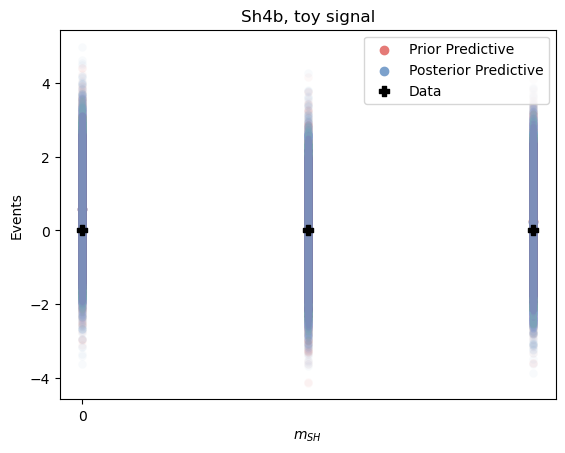

In [7]:
plotting.prior_posterior_predictives(model, data, post_pred, prior_pred, 10)

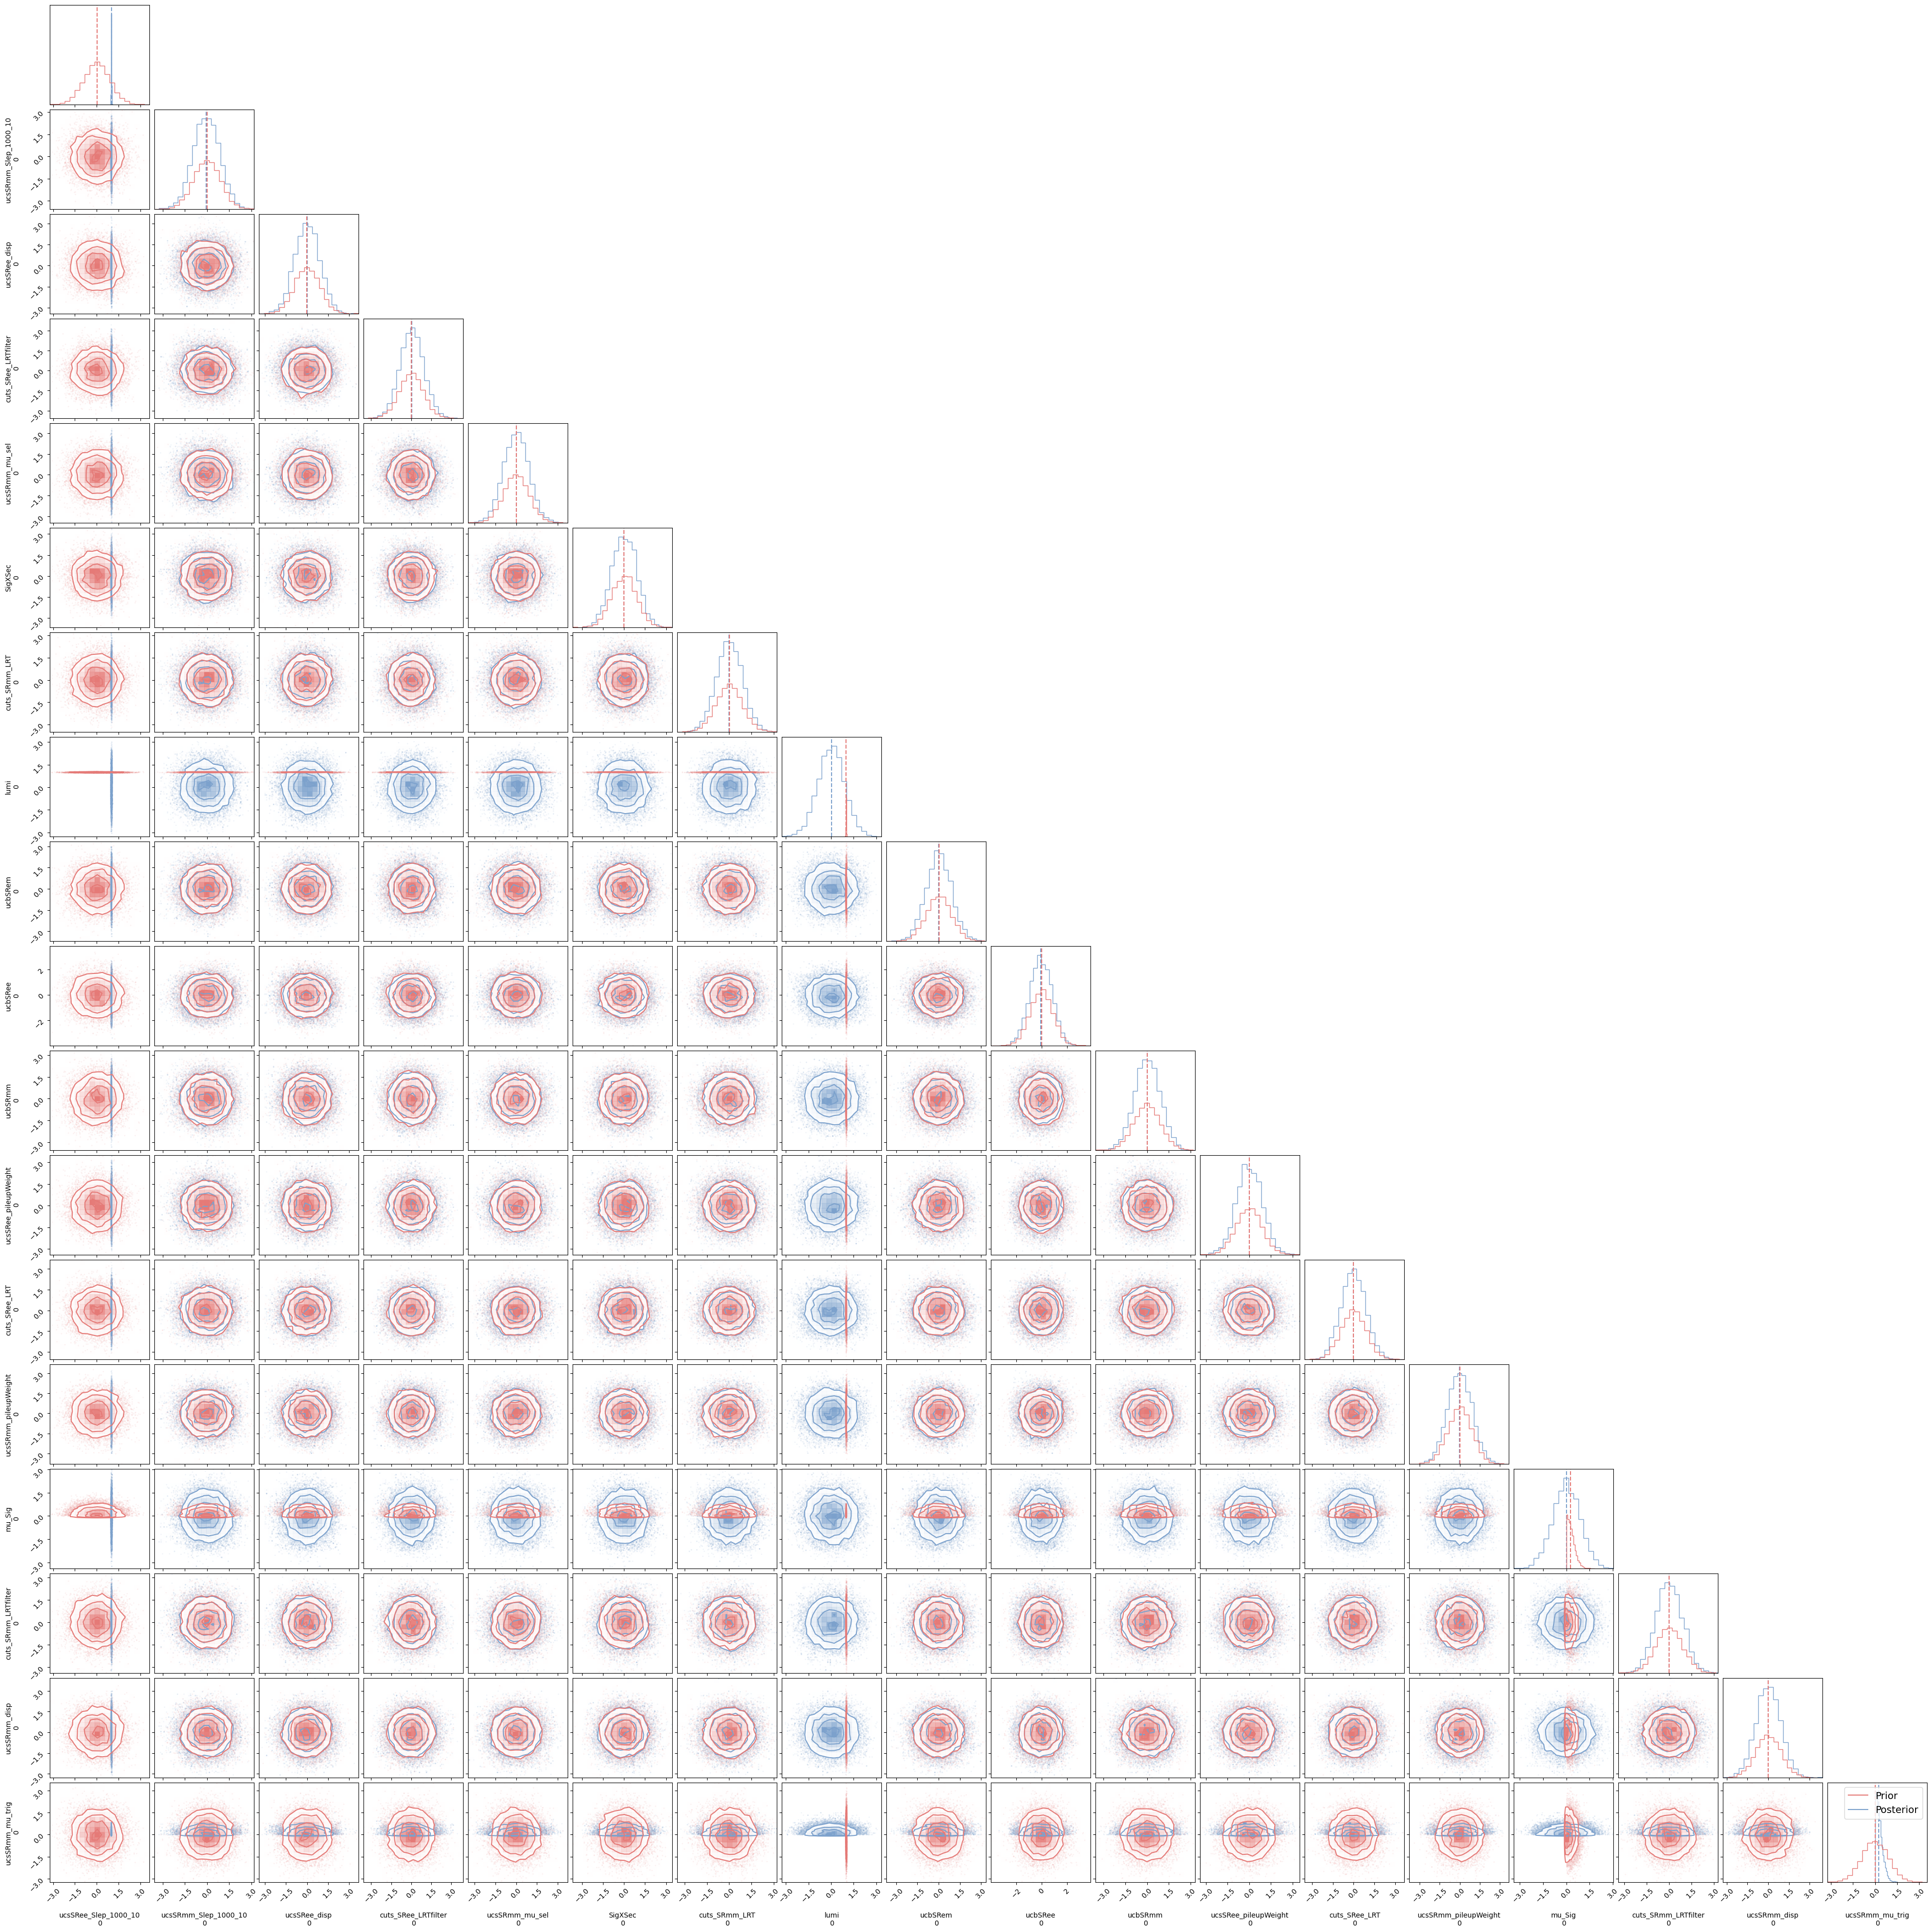

In [11]:
import matplotlib.lines as mlines

a = corner.corner(post_data.posterior, quantiles=[0.5], color = blue);
corner.corner(prior_pred.prior, quantiles=[0.5], color = rosa, fig = a);

plt.legend(handles=[
            (mlines.Line2D([], [], color=rosa, label='Prior')),
            (mlines.Line2D([], [], color=blue, label='Posterior'))
        ], loc="upper right", fontsize=14)